# Assignment 3

This assignment uses the weather data from Lab 1, from [https://github.com/fivethirtyeight/data/tree/master/us-weather-history](https://github.com/fivethirtyeight/data/tree/master/us-weather-history).  We used the KNYC.csv in Lab 1, and will also use KCLT.csv, which is the weather data for Charlotte, NC, in this assignment.

This assignment will look at different ways to predict the actual maximum daily temperature in New York using linear regression.  The actual maximum temperature was the maximum temperature recorded on that day.

1. Predicting the NYC actual max temperature from the NYC average max temperature:
    
    a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What is the equation for the linear model?  What proportion of the variance is explained by the model (R-squared)?
    
    c. Plot a histogram of the residuals of your model from part b.  Describe their distribution.  Based on this and your results from parts a and b, do you think this linear model is a good fit?  Why or why not?
    
2. Predicting the NYC actual max temperature from the Charlotte actual max temperature:
    Note:  To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]`
    
    a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What proportion of the variance is explained by the model?
    
    c. Predict the NYC actual max temperature if the Charlotte max temperature is 32F, 60F, and 80F.
    
    d. Plot a histogram of the residuals of your model from part b.  Describe their distribution.
    
    e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.  What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?
    
    f. Based on the previous parts, do you think this linear model is a good fit?
    
3. Predicting the NYC actual max temperature from both the average max temperature and the Charlotte actual max temperature:
    a. Compute a linear regression model with both the average max temperature and the Charlotte actual max temperature as the independent variables.  What proportion of variance is explained by this model?
    
    b. Plot a histogram of the residuals. Describe their distribution.
    
    c. Make a scatter plot of the NYC actual max temperatures (x axis) and the fitted NYC actual max temperatures (y axis).  What do you notice about the plot?

# Edward Biswas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline

Predicting the NYC actual max temperature from the NYC average max temperature:

a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line. Do you think this data has a linear relationship?

b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature. What is the equation for the linear model? What proportion of the variance is explained by the model (R-squared)?

c. Plot a histogram of the residuals of your model from part b. Describe their distribution. Based on this and your results from parts a and b, do you think this linear model is a good fit? Why or why not?

In [3]:
nyc_weather = pd.read_csv('KNYC.csv')

In [6]:
clt_weather = pd.read_csv('KCLT.csv')
clt_weather.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


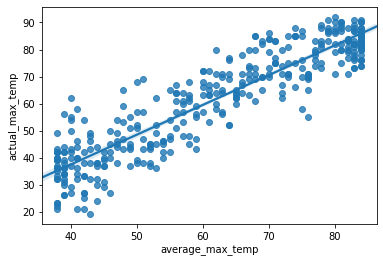

In [7]:
sns.regplot(data=nyc_weather, x='average_max_temp', y='actual_max_temp')

Yes, the data has linear relationship.

In [29]:
lm_1 = smf.ols('actual_max_temp ~ average_max_temp', data=nyc_weather).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1776.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          7.37e-142
Time:                        16:52:46   Log-Likelihood:                -1277.0
No. Observations:                 365   AIC:                             2558.
Df Residuals:                     363   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.7238      1.678     -4.007      0.000     -10.024      -3.424
average_max_temp     1.1027      0.026     42.137      0.000       1.051       1.154
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.714
Skew:                           0.101   Prob(JB):                        0.700
Kurtosis:                       2.924   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝑦=−6.7238+1.1027𝑥

R squared = 83%

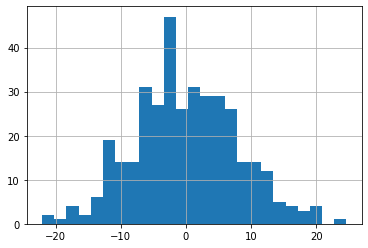

In [30]:
lm_1.resid.hist(bins = 25)

Normal Distribution

Predicting the NYC actual max temperature from the Charlotte actual max temperature: Note: To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.
ex. nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]

a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line. Do you think this data has a linear relationship?

b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature. What proportion of the variance is explained by the model?

c. Predict the NYC actual max temperature if the Charlotte max temperature is 32F, 60F, and 80F.

d. Plot a histogram of the residuals of your model from part b. Describe their distribution.

e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model. If you are using plt.scatter() you can add a horizontal line to your plot at 0 with the code plt.axhline(0). What do you notice about how the residuals are distributed above and below this line? What tempertures will be overestimated by this model? What temperatures will be underestimated by this model?

f. Based on the previous parts, do you think this linear model is a good fit?

In [14]:
nyc_weather['cht_actual_max_temp'] = clt_weather['actual_max_temp']
nyc_weather.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,cht_actual_max_temp
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17,91
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79,95
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80,93
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76,86
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07,84


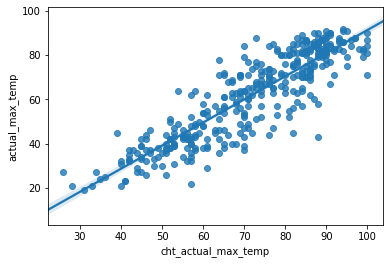

In [15]:
sns.regplot(data=nyc_weather, x='cht_actual_max_temp', y='actual_max_temp')

Yes, the data has linear relationship.

In [25]:
lm_2 = smf.ols('cht_actual_max_temp ~ actual_max_temp', data=nyc_weather).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     cht_actual_max_temp   R-squared:                       0.781
Model:                             OLS   Adj. R-squared:                  0.781
Method:                  Least Squares   F-statistic:                     1298.
Date:                 Tue, 08 Oct 2019   Prob (F-statistic):          6.32e-122
Time:                         16:52:11   Log-Likelihood:                -1262.0
No. Observations:                  365   AIC:                             2528.
Df Residuals:                      363   BIC:                             2536.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.4659      1.343     18.958      0.000      22.824      28.107
actual_max_temp     0.7478      0.021     36.028      0.000       0.707       0.789
==============================================================================
Omnibus:                        9.620   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.517
Skew:                           0.308   Prob(JB):                      0.00520
Kurtosis:                       3.559   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Charlotte 32F -> NYC 20F

Charlotte 60F -> NYC 50F

Charlotte 80F -> NYC 70F

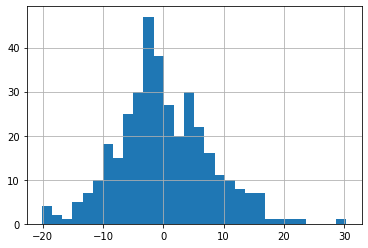

In [26]:
lm_2.resid.hist(bins = 30)

Normal Distribution

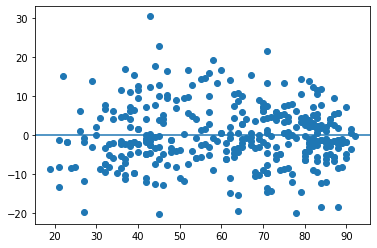

In [28]:
plt.scatter(x=nyc_weather['actual_max_temp'], y=lm_2.resid)
plt.axhline(0)

The distribution seems to be even. 

I guess this model is a pretty good fit.

a. Predicting the NYC actual max temperature from both the average max temperature and the Charlotte actual max temperature: a. Compute a linear regression model with both the average max temperature and the Charlotte actual max temperature as the independent variables. What proportion of variance is explained by this model?

b. Plot a histogram of the residuals. Describe their distribution.

c. Make a scatter plot of the NYC actual max temperatures (x axis) and the fitted NYC actual max temperatures (y axis). What do you notice about the plot?

In [22]:
lm_3 = smf.ols('actual_max_temp ~ average_max_temp + cht_actual_max_temp', data=nyc_weather).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1257.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          1.19e-163
Time:                        16:51:48   Log-Likelihood:                -1222.4
No. Observations:                 365   AIC:                             2451.
Df Residuals:                     362   BIC:                             2462.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -15.0091      1.624     -9.242      0.000     -18.203     -11.815
average_max_temp        0.6962      0.043     16.328      0.000       0.612       0.780
cht_actual_max_temp     0.4680      0.042     11.235      0.000       0.386       0.550
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.568
Skew:                          -0.034   Prob(JB):                        0.277
Kurtosis:                       3.405   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared = 87.3%

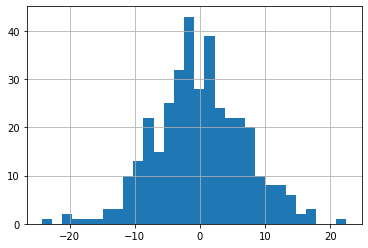

In [23]:
lm_3.resid.hist(bins=30)

Normal Distribution 

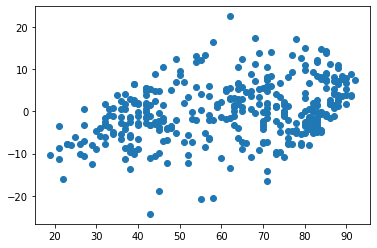

In [24]:
plt.scatter(x=nyc_weather['actual_max_temp'], y=lm_3.resid)

This scatter plot is very similar to the previous model.